<h1 style="text-align: center">
    Qu'est ce que le SVC ?
</h1>

* Basé sur le modèle ***SVM*** (Support Vector Machine, ou Machine à Vecteurs de Support en français), le ***SVC*** (Support Vector Classification, ou Classification par Vecteurs de Support en français) est un modèle spécialisé pour la classification binaire et/ou multi-classes.
Son fonctionnement se base sur l'identification d'un ***hyperplan*** soit le tracé d'une équation de droite/courbe en 2D ou bien d'une surface en 3D afin d'obtenir une séparation visuelle (frontière) optimale entre les différentes classes (cibles à predire).

<hr>

* Le ***SVC*** existe sous plusieurs modélisation le standard soit le ***SVC***, le ***NuSVC*** (variante premier se concentrant sur les notions d'erreurs et de marges du modèle) et le ***LinearSVC*** (optimisé pour les cas de modélisation linéaire).

# Hyperparamètres du modèle SVC :

* ***C*** : C'est le paramètre permettant de régulariser au mieux le model en jouant sur le compromis erreur/marge. Cette valeur doit être positive et est par défaut à 1.

* ***kernel*** : Le kernel est ce que l'on pourrait appeler un noyau, c'est une fonction permettant de transformer les données d'entrée en de plus hauts niveaux (plus hautes dimensions). Concrètement cela nous permet d'optimiser la ou les frontières de décisions de classifications. Les différents kernel disponible étant : ***linear***, ***poly***, ***rbf*** et ***sigmoid***.

* ***degree*** : Dans le cas d'un kernel de type ***poly*** on doit spécifier le dégrée du polynôme à utiliser dans le modèle.

* ***gamma*** : Se basant sur l'utilisation des noyaux "rbf" ou "poly", ***gamma*** permets de contrôler la complexité du modèle. Ainsi plus ***gamma*** est grand, plus le modèle sera complexe et donc plus précis dans la création d'une frontière. Attention cependant, car un ***gamma*** trop élevé entrainera un surapprentissage du modèle.

* ***coef0*** : Ce paramètre est utilisable dans le cas d'un noyau ***sigmoid*** ou ***poly***, c'est un facteur d'ajustement des fonctions de transformation des données dans le modèle.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


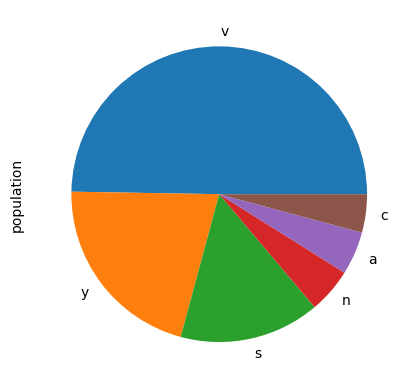

In [9]:
df.population.value_counts().plot(kind='pie');

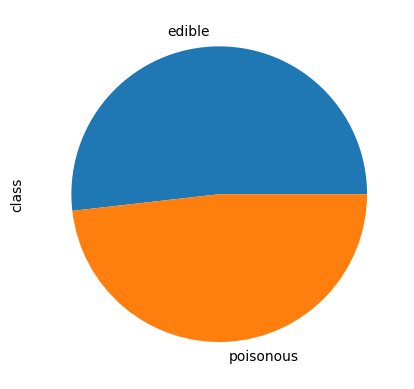

In [10]:
df['class'] = df['class'].apply(lambda x: 'poisonous' if x == 'p' else 'edible')
df['class'].value_counts().plot(kind='pie');

In [11]:
y = df['class']
X = df.drop(columns=['class'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
ordinal = OrdinalEncoder()
ordinal.fit(X_train)
X_train_cat = ordinal.transform(X_train)
X_train_cat = pd.DataFrame(X_train_cat)

In [14]:
clf = SVC()
clf.fit(X_train_cat, y_train)

SVC()

In [15]:
X_test_cat = ordinal.transform(X_test)
X_test_cat = pd.DataFrame(X_test_cat)

In [16]:
y_pred = clf.predict(X_test_cat)

In [17]:
print('Score :', clf.score(X_test_cat, y_test))

Score : 0.9913846153846154


In [18]:
scores = cross_val_score(clf, X_train_cat, y_train, cv=5)
print('Cross validation scores : ', scores)

Cross validation scores :  [0.98615385 0.99076923 0.98769231 0.99       0.9830639 ]


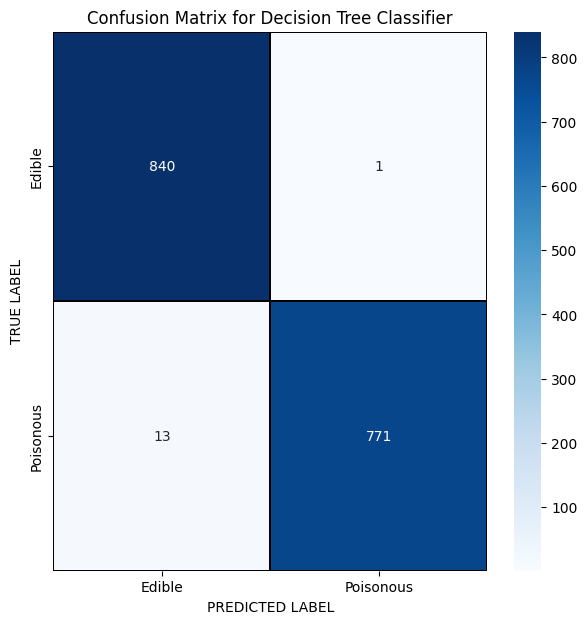

In [19]:
confusion_m = confusion_matrix(y_test, y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(pd.DataFrame(confusion_m), annot=True, linewidths=0.2, linecolor="black",
fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {:.2f}%".format(accuracy*100))

Accuracy : 99.14%


In [21]:
recall_scoring = recall_score(y_test, y_pred, average=None)
print('Recall score :', recall_scoring)

Recall score : [0.99881094 0.98341837]


In [22]:
print('Precision :', precision_score(y_test, y_pred, average=None))

Precision : [0.98475967 0.99870466]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      edible       0.98      1.00      0.99       841
   poisonous       1.00      0.98      0.99       784

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [24]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_cat, y_train,train_sizes=[50, 500, 1000, 2500, 5000], cv=5)

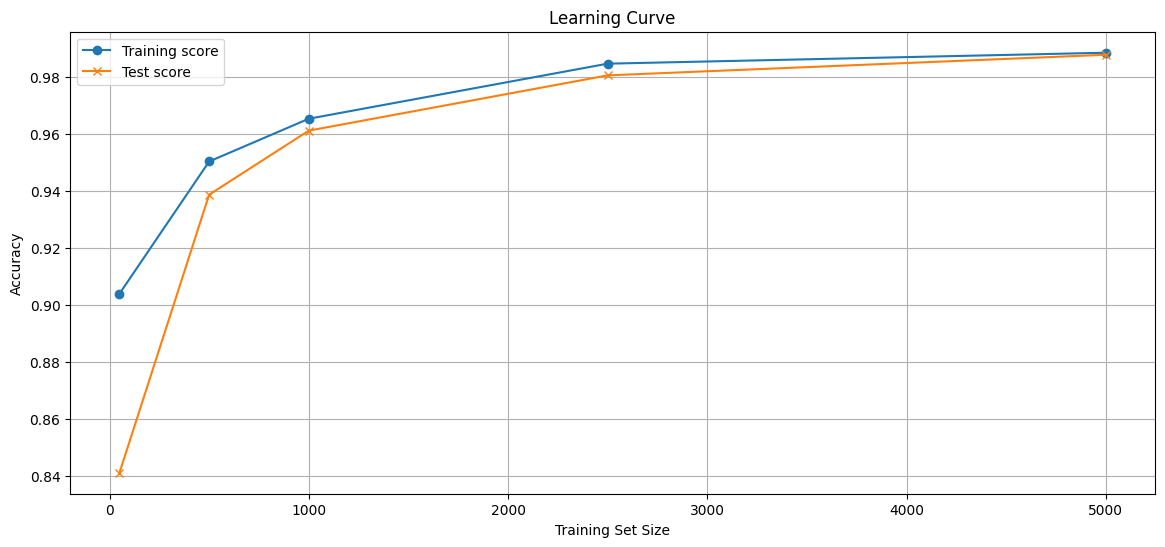

In [25]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.subplots(figsize=(14,6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test score', marker='x')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid()
plt.show();